- ## 로지스틱 회귀
    - 이진 분류
        - 주어진 데이터를 두 개의 클래스로 나누는 분류기를 학습시키는 지도 학습 문제임
            - 지도 학습은 레이블이 있는 학습 데이터를 통해 학습시키는것을 의미함

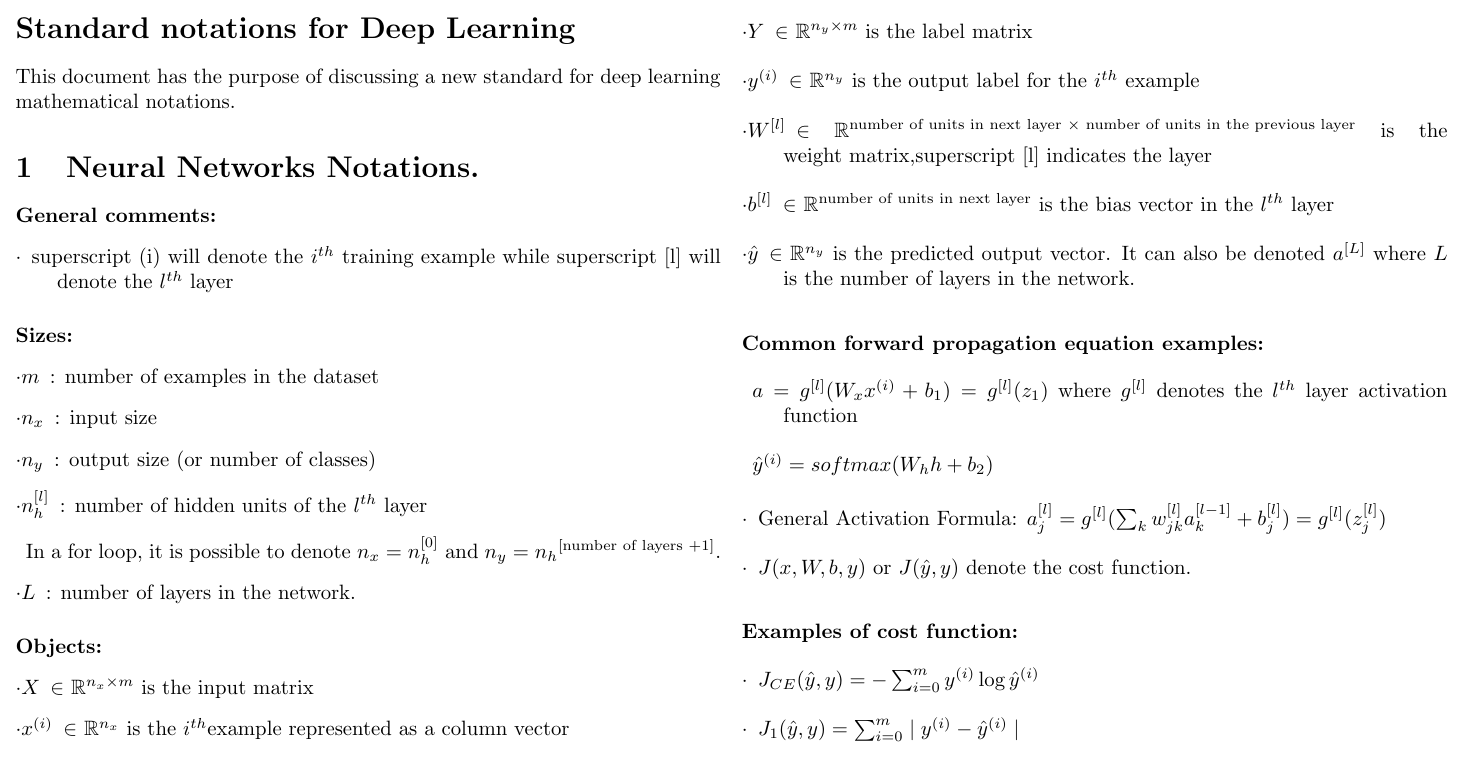

- ## 신경망 수식 해석
    - 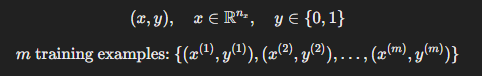
    - 훈련 표본 하나는 $(x,y)$로 이루어져있으며
    - $n_x$ 차원의 $x$와 레이블 값을 지닌 $y$로 이루어져 있다
    - 전체 훈련 표본 갯수을 $m = m_{train}$ 라 한다


    - 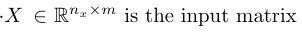
    - $X$를 $n_x*m$차원의 Input Matrix이라고 하며
    - 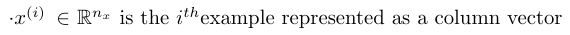
    - $x^{(i)}$은 $i$번째 표본의 행 벡터이다


    - 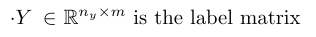
    - $Y$를 $n_y*m$차원의 Label Matrix이라고 한다 
    - 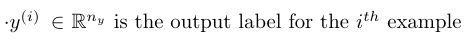
    - $y^{(i)}$는 $i$번째 표본의 레이블이다

    - 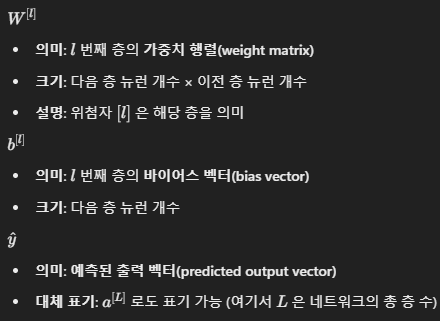



- ## 예시


    - 추정값 예시
        -   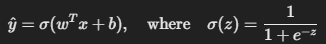
        - 추정치 $\hat{y}$를 가중치, 편향을 시그모이드 함수에 넣어서 구한 것

    - 손실 함수 예시
        - 손실 함수는 단일 학습에 대한 오류 계산임
        - 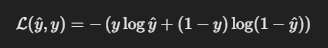
        - Binary Cross-Entropy Loss 수식임
    - 비용 함수 예시
        - 비용 함수는 전체 학습 세트에 대한 손실함수의 평균임
        - $J_{CE}(\hat{y}, y) = - \sum_{i=0}^{m} y^{(i)} \log \hat{y}^{(i)}$

        - $J_1(\hat{y}, y) = \sum_{i=0}^{m} \left| y^{(i)} - \hat{y}^{(i)} \right|$

### 경사 하강법 (Gradient Descent)

#### **1. 기본 경사 하강법 업데이트 식**
비용 함수의 경사를 타고 차근차근 내려와 극솟값에 도달하는것임


가중치 \( w \) 와 편향 \( b \) 를 경사 하강법을 이용하여 업데이트하는 식은 다음과 같다.

- 가중치 업데이트:
  $$
  w := w - \alpha \frac{\partial J}{\partial w}
  $$
- 비용함수에 대한 가중치의 편미분값을 학습률 $\alpha$만큼 곱해서 뺌
- 편향 업데이트:
  $$
  b := b - \alpha \frac{\partial J}{\partial b}
  $$
- 비용함수에 대한 편향의 편미분값을 학습률 $\alpha$만큼 곱해서 뺌


- ## 역전파 과정
    - $ z = w^T x + b $

    - $ \hat{y} = a = \sigma(z) $

    - $ \mathcal{L}(a, y) = - \left( y \log a + (1 - y) \log (1 - a) \right) $

    - 이 수식에서 손실함수에 대한 가중치의 미분값($w^t$), 편향의 미분값($b$)을  구해야함

    - 연쇄 법칙으로 구할 것

    - 수식은 다 나와있으니 도함수 통해서 구하면 됨
